# 3.1 线性基函数模型

之前我们一直在考虑概率密度估计这样的非监督问题。现在我们考虑监督问题，从简单的回归问题开始。

对于回归问题，我们有一个 $D$ 维的输入 $\sf x$，和一个或多个连续的目标输出 $\sf t$。在第一章我们遇到了多项式回归的问题，现在我们扩展这个问题，利用一组固定的非线性基函数的线性组合，得到一个线性回归模型。

### 问题设定

假设我们有 $N$ 个观测数据 $\{\mathbf x_n\}, n=1,\dots, N$，以及对应的目标值 $\{t_n\}$，我们的目标是对于预测 $\bf x$ 对应的目标值 $t$。

之前的讨论我们知道，最简单的方法是找到一个函数 $y(\mathbf x)$，使得 $y(\mathbf x)$ 的值能够很好的模拟 $t$。

从概率的角度来说，我们希望对 $p(t|\mathbf x)$ 进行建模，因为对于 $\mathbf x$ 来说，$t$ 具有一定的不确定性。

### 线性基函数模型

最简单的线性回归模型即输入数据的线性组合：

$$
y(\mathbf{x,w}) = w_0 + w_1x_1 + \cdots + w_Dx_D
$$

其中 $\mathbf x = (x_1,\dots,x_D)^\top$，这就是简单的线性回归模型（`linear regression`）。

一个重要的性质在于，它是参数 $w_0, w_1, \dots, w_D$ 的一个线性组合（当然，它也是 $\bf x$ 的线性组合，但是这限制了我们的模型）。基于这个性质，我们将这个线性回归进行扩展，变成一组关于 $\mathbf x$ 的非线性函数的线性组合：

$$
y(\mathbf{x,w}) = w_0 + \sum_{j=1}^{M-1} w_j \phi_j(\mathbf x)
$$

这里 $\phi_j(\mathbf x)$ 就是所谓的基函数（`basis function`）。这里限制 $w$ 的下标最大为 $M-1$，表示我们的参数数目为 $M$

$w_0$ 通常叫做偏置项（`bias`）（注意不要跟统计中的 `bias` 混淆，统计中它指的是一个估计量偏离其均值的程度），对任何输入它的作用都是一样的。

通常为了方便，我们定义 $\phi_0(\mathbf x)=1$，这样我们得到：

$$
y(\mathbf{x,w}) = \sum_{j=0}^{M-1} w_j \phi_j(\mathbf x) = \mathbf{w^\top \phi(x)}
$$

其中 $\mathbf w = (w_0,\dots,w_{M-1})^\top$，$\mathbf \phi=(\phi_0,\dots,\phi_{M-1})^\top$。

在很多应用中，我们通常会对原始输入进行一些预处理或者特征选择，这些得到的特征可以被认为是基函数 $\{\phi_j(\mathbf x)\}$。

虽然我们的模型叫做线性基函数模型（`linear basis function models`），但这个模型事实上可以是非线性的；它的线性体现在参数 $\mathbf w$ 上。

在之前的多项式函数模型中，我们相当于选择了这样的基函数 $\phi_j = x^j$。多项式拟合的一个局限在于，这个函数是一个输入变量的全局函数，因此在一个区域内数据点的改变会影响到其他所有区域。为此，我们可以考虑将输入空间划分成多个区域，然后在这些区域内使用不同的多项式拟合模型，这就是所谓 `spline` 函数的想法。

常用的基函数有高斯基函数：

$$
\phi_j(x) = \exp\left\{-\frac{x-\mu_j}{2s^2}\right\}
$$


sigmoid 基函数：


$$
\phi_j(x) = \sigma\left\{\frac{x-\mu_j}{s}\right\}
$$

其中

$$
\sigma(a)=\frac{1}{1+\exp(-a)}
$$

等价的我们还可以用 tanh 函数，因为 $\tanh(a) = 2\sigma(a)-1$，所以 sigmoid 函数的线性组合与 tanh 函数的线性组合是等效的。

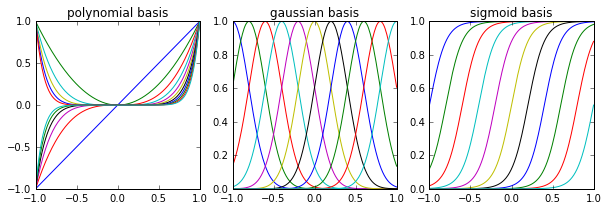

In [20]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

_, axes = plt.subplots(1, 3, figsize=(10, 3))

tt = np.linspace(-1, 1, 200)

for s in np.arange(1, 11.5, 1):
    axes[0].plot(tt, tt ** s)
    axes[1].plot(tt, np.exp(-(tt - (s - 6)/5.0) ** 2 / (2 * 0.04)))
    axes[2].plot(tt, 1.0 / (1 + np.exp(-(tt - (s - 6)/5.0) / 0.1)))


axes[0].set_title('polynomial basis')
axes[1].set_title('gaussian basis')
axes[2].set_title('sigmoid basis')

plt.show()

另一个常用的基函数是傅里叶基，对应于一组三角函数的展开，每个基函数代表一种特定的频率成分，如果我们在空间和频率上对其进行限制，我们可以得到小波变换 `wavelets`。

### 3.1.1 最大似然和最小二乘

在之前的多项式拟合中，我们发现，我们可以从最小平方和误差和最大似然两个角度去理解回归问题的求解。现在我们仔细解释这个模型。

$$
t = y(\mathbf{x,w}) +\epsilon
$$

其中 $p(\epsilon|\beta)=\mathcal N(\epsilon|0,\beta^{-1})$，于是我们有：

$$
p(t|\mathbf{x,w},\beta)=\mathcal N(t|y(\mathbf{x,w}),\beta^{-1})
$$

在 [1.5.5](../Chap-01-Introduction/01-05-Decision-Theory.ipynb#1.5.5-回归问题的损失函数) 节，我们知道，如果我们使用平方误差函数，那么最优解为目标值 $t$ 的条件均值。所以，在高斯分布的条件下，条件分布的均值为：

$$
\mathbb E[t|\mathbf x] = y(\mathbf{x,w})
$$

回到线性基函数的问题上，假设有一组独立同分布的数据 $\mathbf X=\{\mathbf x_1,\dots,\mathbf x_N\}$ 及其对应目标 $\mathsf t = (t_1,\dots, t_N)^T $。独立同分布假设下，似然函数为：

$$
p(\mathsf t|\mathbf{X,w},\beta) = \prod_{n=1}^N \mathcal N(t_n|\mathbf w^\top\mathbf \phi(\mathbf x_n),\beta^{-1})
$$

只考虑参数项，对数似然为：

$$
\begin{aligned}
\ln p(\mathsf t|\mathbf{w},\beta) & = \sum_{n=1}^N \ln \mathcal N(t_n|\mathbf w^\top\mathbf \phi(\mathbf x_n),\beta^{-1}) \\
& = \frac{N}{2}\ln \beta - \frac{N}{2}\ln (2\pi) - \beta E_D(\mathbf w)
\end{aligned}
$$

其中 $E_D(\mathbf w)$ 是平方和误差：

$$
E_D(\mathbf w) = \frac{1}{2}\sum_{n=1}^N \{t_n-\mathbf w^\top\mathbf \phi(\mathbf x_n)\}^2
$$